1-EDA
2-Preprocessing
     Outlier detection and removal
     Missing data generation
     Scaling features
3-Missing data imputation
4-Finding best params via Grid search
5-Classifier creation
6-Cross validation via:
            1-Stratified k-fold
            2-K-fold

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt   

In [2]:
%matplotlib inline

In [3]:
import numpy as np

# *Reading the dataset

In [4]:
dataset = pd.read_csv('heart.csv')

#  1-Exploratory Data  Analysis (EDA)

## 1.1-first and last five instances of dataset 

In [5]:
#the first five observations
dataset.head()

age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0    1   3     145.0    NaN    1        0    150.0      0      2.3   
1  37.0    1   2     130.0  250.0    0        1    187.0      0      3.5   
2  41.0    0   1     130.0  204.0    0        0      NaN      0      NaN   
3  56.0    1   1     120.0  236.0    0        1    178.0      0      0.8   
4  57.0    0   0     120.0    NaN    0        1    163.0      1      0.6   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
4      2   0     2       1

In [6]:
#the last five observations
dataset.tail()

age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
298  57.0    0   0     140.0  241.0    0        1    123.0      1      0.2   
299  45.0    1   3     110.0    NaN    0        1    132.0      0      1.2   
300  68.0    1   0     144.0  193.0    1        1      NaN      0      3.4   
301  57.0    1   0     130.0  131.0    0        1    115.0      1      1.2   
302  57.0    0   1       NaN  236.0    0        0    174.0      0      NaN   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

## 1.2-General specifications of the dataset

In [7]:
#dimensions of the dataset
dataset.shape

(303, 14)

## 1.3-Columns and their data type


In [8]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## 1.4-Number of unique values taken by each feature

In [9]:
dataset.nunique()

age          41
sex           2
cp            4
trestbps     48
chol        142
fbs           2
restecg       3
thalach      90
exang         2
oldpeak      39
slope         3
ca            5
thal          4
target        2
dtype: int64

## 1.5-Unique values taken by each feature and Feature description

how many of the features are numerical and how many are categorical

In [10]:
numerical_variables = dataset.columns[dataset.dtypes !='object']
categorical_variables = dataset.columns[dataset.dtypes == 'object']

print(numerical_variables)
print(categorical_variables)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index([], dtype='object')


So we've got no categorical data

##### feature description and unique values and number of iteratation of values

###### feature 1

In [11]:
dataset['age'].value_counts()

58.0    17
57.0    15
54.0    12
52.0    12
62.0    11
51.0    11
44.0    10
64.0    10
59.0    10
67.0     9
60.0     9
63.0     9
56.0     8
45.0     8
46.0     7
43.0     7
41.0     7
42.0     7
65.0     7
55.0     7
53.0     6
61.0     6
50.0     6
66.0     5
48.0     5
49.0     5
70.0     4
68.0     4
35.0     4
47.0     4
39.0     4
69.0     3
40.0     3
71.0     3
38.0     3
34.0     2
37.0     2
29.0     1
74.0     1
76.0     1
77.0     1
Name: age, dtype: int64

feature 'age' has got 41 unique values

###### feature 2 

In [12]:
dataset['sex'].unique()

array([1, 0], dtype=int64)

1 = male; 0 = female

In [14]:
dataset['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

###### feature 3 

In [13]:
dataset['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

######  cp: chest pain type
###### -- Value 1: typical angina
###### -- Value 2: atypical angina
###### -- Value 3: non-anginal pain
###### -- Value 4: asymptomatic

In [14]:
dataset['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

###### feature 4 

In [15]:
dataset['trestbps'].unique()

array([145., 130., 120., 140.,  nan, 172., 150., 110., 135., 160., 105.,
       125., 142., 155., 104., 138., 128., 134., 122., 115., 118., 108.,
       100., 124.,  94., 112., 152., 102., 101., 132., 148., 178., 129.,
       136., 126., 106., 170., 117., 180., 200., 165., 174., 192., 144.,
       123., 146., 154., 114., 164.])

 (trestbps): resting blood pressure (in mm Hg on admission to the hospital)

###### feature 5

In [16]:
dataset['chol'].unique()

array([ nan, 250., 204., 236., 192., 294., 263., 199., 168., 239., 275.,
       266., 283., 219., 340., 226., 247., 234., 233., 243., 302., 212.,
       175., 417., 197., 198., 177., 213., 304., 232., 269., 360., 308.,
       245., 208., 264., 321., 235., 257., 216., 256., 231., 141., 252.,
       182., 303., 265., 309., 203., 211., 183., 222., 220., 258., 227.,
       261., 221., 205., 240., 318., 298., 564., 214., 248., 255., 207.,
       288., 160., 394., 315., 246., 270., 195., 196., 244., 254., 325.,
       126., 313., 215., 193., 271., 268., 267., 210., 277., 201., 295.,
       306., 178., 209., 242., 228., 149., 278., 157., 286., 229., 284.,
       224., 206., 167., 230., 335., 276., 330., 290., 253., 172., 305.,
       188., 282., 185., 274., 164., 260., 249., 341., 407., 217., 174.,
       281., 289., 322., 299., 300., 293., 184., 409., 273., 200., 327.,
       237., 218., 319., 166., 223., 225., 169., 187., 176., 241., 131.])

###### (chol): serum cholestoral in mg/dl

###### feature 6

In [17]:
dataset['fbs'].unique()

array([1, 0], dtype=int64)

In [18]:
dataset['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

(fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

###### feature 7 

In [19]:
dataset['restecg'].unique()

array([0, 1, 2], dtype=int64)

######   (restecg): restecg: resting electrocardiographic results
###### -- Value 0: normal
###### -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation ordepression of > 0.05 mV)
###### -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

In [20]:
dataset['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

###### feature 8 

In [21]:
dataset['thalach'].unique()

array([150., 187.,  nan, 178., 163., 148., 153., 173., 174., 160., 139.,
       171., 144., 162., 158., 172., 114., 151., 161., 179., 137., 157.,
       123., 152., 168., 140., 188., 125., 170., 142., 180., 143., 182.,
       156., 115., 149., 146., 175., 186., 185., 159., 130., 190., 132.,
       165., 147., 166., 164., 184., 154., 122., 169., 138., 111., 145.,
       194., 131., 133., 155., 167., 192., 121.,  96., 126., 105., 181.,
       116., 108., 129., 120., 112., 128., 109., 113.,  99., 177., 141.,
       136.,  97., 127., 103., 124.,  88., 195., 106.,  95., 117.,  71.,
       118., 134.,  90.])

(thalach): maximum heart rate achieved

###### feature 9 

In [22]:
dataset['exang'].unique()

array([0, 1], dtype=int64)

(exang): exercise induced angina (1 = yes; 0 = no)

In [23]:
dataset['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

###### feature 10

In [24]:
dataset['oldpeak'].unique()

array([2.3, 3.5, nan, 0.8, 0.6, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8, 1.5,
       0.4, 1. , 1.4, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.6, 2.2, 2.8, 3.4, 6.2, 4. , 2.9, 2.1, 3.8,
       4.4])

(oldpeak): ST depression induced by exercise relative to rest

###### feature 11

In [25]:
dataset['slope'].unique()

array([0, 2, 1], dtype=int64)

###### (slope): the slope of the peak exercise ST segment
###### -- Value 1: upsloping
###### -- Value 2: flat
###### -- Value 3: downsloping

In [26]:
dataset['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

###### feature 12

In [27]:
dataset['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

(ca): number of major vessels (0-3) colored by flourosopy

In [28]:
dataset['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [29]:
dataset['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

(thal): 3 = normal; 6 = fixed defect; 7 = reversable defect

In [30]:
dataset['target'].unique()

array([1, 0], dtype=int64)

###### (num) (the predicted attribute): diagnosis of heart disease (angiographic disease status)
###### -- Value 0: < 50% diameter narrowing
###### -- Value 1: > 50% diameter narrowing

In [31]:
dataset['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

## 1.6- How many missing values are in each column

In [32]:
dataset.isnull().sum().sort_values(ascending=False)

chol        41
age         37
trestbps    30
thalach     24
oldpeak     23
target       0
thal         0
ca           0
slope        0
exang        0
restecg      0
fbs          0
cp           0
sex          0
dtype: int64

## 1.7- Percentage of missing data for every feature
## and how many more needed

In [119]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
           'exang', 'oldpeak', 'slope', 'ca', 'thal']
def missing (dataset,columns):
    for column in columns:
        d = dataset[column].isnull().sum()
        
        Minmum_number_of_missings_needed = round(0.14*dataset.shape[0]-d)
        print(column + "   missing data percentage is   " + str(int(d)/dataset.shape[0]))
        print("Minmum_number_of_missings_needed  is  " + str(Minmum_number_of_missings_needed)) 

In [34]:
missing(dataset,columns)

age   missing data percentage is   0.12211221122112212
Minmum_number_of_missings_needed  is  5
sex   missing data percentage is   0.0
Minmum_number_of_missings_needed  is  42
cp   missing data percentage is   0.0
Minmum_number_of_missings_needed  is  42
trestbps   missing data percentage is   0.09900990099009901
Minmum_number_of_missings_needed  is  12
chol   missing data percentage is   0.1353135313531353
Minmum_number_of_missings_needed  is  1
fbs   missing data percentage is   0.0
Minmum_number_of_missings_needed  is  42
restecg   missing data percentage is   0.0
Minmum_number_of_missings_needed  is  42
thalach   missing data percentage is   0.07920792079207921
Minmum_number_of_missings_needed  is  18
exang   missing data percentage is   0.0
Minmum_number_of_missings_needed  is  42
oldpeak   missing data percentage is   0.07590759075907591
Minmum_number_of_missings_needed  is  19
slope   missing data percentage is   0.0
Minmum_number_of_missings_needed  is  42
ca   missing data perc

## 1.8- Little picture of dataset

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         266 non-null float64
sex         303 non-null int64
cp          303 non-null int64
trestbps    273 non-null float64
chol        262 non-null float64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     279 non-null float64
exang       303 non-null int64
oldpeak     280 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(5), int64(9)
memory usage: 33.3 KB


## 1.9- some of descriptive statistics of dataset

In [36]:
dataset.describe()

age         sex          cp    trestbps        chol         fbs  \
count  266.000000  303.000000  303.000000  273.000000  262.000000  303.000000   
mean    54.417293    0.683168    0.966997  131.597070  244.805344    0.148515   
std      9.344291    0.466011    1.032052   17.639536   52.622165    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.000000    0.000000    0.000000  120.000000  208.250000    0.000000   
50%     55.500000    1.000000    1.000000  130.000000  239.500000    0.000000   
75%     62.000000    1.000000    2.000000  140.000000  274.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  279.000000  303.000000  280.000000  303.000000  303.000000   
mean     0.528053  148.541219    0.326733    1.023571    1.399340    0.729373   
std      0.525860   22.898845    0.469794    1.156413    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  132.000000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  152.000000    0.000000    0.650000    1.000000    0.000000   
75%      1.000000  165.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  195.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

 since all our data are numerical and none are strings, we're pretty much qualified for using this function.

## 1.10- Histogram of attributes

C:\Users\pc\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\pc\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\pc\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\pc\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.

[[<AxesSubplot:title={'center':'age'}>
  <AxesSubplot:title={'center':'ca'}>
  <AxesSubplot:title={'center':'chol'}>
  <AxesSubplot:title={'center':'cp'}>]
 [<AxesSubplot:title={'center':'exang'}>
  <AxesSubplot:title={'center':'fbs'}>
  <AxesSubplot:title={'center':'oldpeak'}>
  <AxesSubplot:title={'center':'restecg'}>]
 [<AxesSubplot:title={'center':'sex'}>
  <AxesSubplot:title={'center':'slope'}>
  <AxesSubplot:title={'center':'target'}>
  <AxesSubplot:title={'center':'thal'}>]
 [<AxesSubplot:title={'center':'thalach'}>
  <AxesSubplot:title={'center':'trestbps'}> <AxesSubplot:> <AxesSubplot:>]]


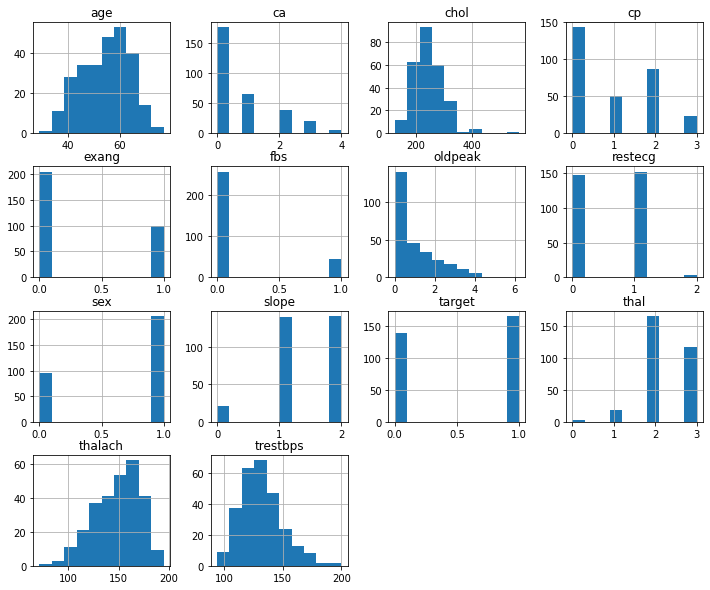

In [37]:
print(dataset.hist(figsize=[12,10]))

## 1.11- Box plot of attributes

<AxesSubplot:>

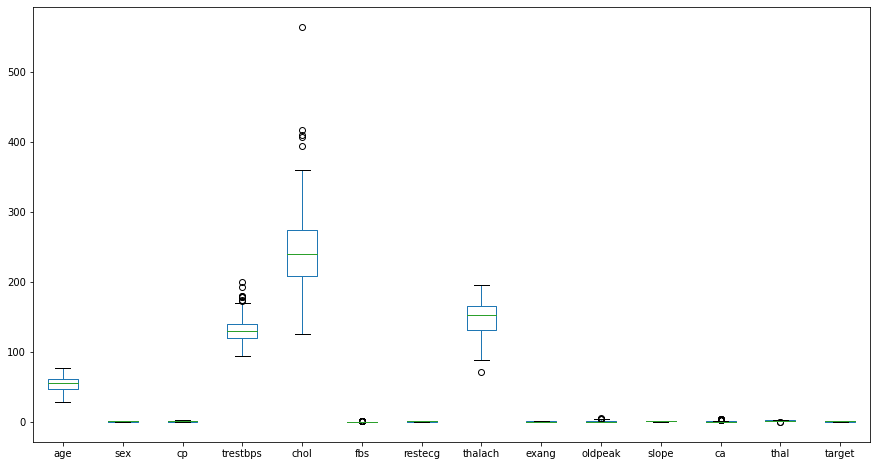

In [39]:
dataset.plot(kind='box',figsize=[15,8])

## 1.12- Proportion of each class in our dataset

<AxesSubplot:xlabel='target', ylabel='count'>

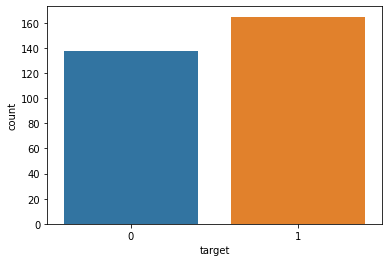

In [40]:
sns.countplot(data=dataset,x=dataset['target'])

It may not be clear how many instances exist in each class

In [41]:
len(dataset[dataset['target']==0])

138

In [42]:
len(dataset[dataset['target']==1])

165

We can see out of 303 records, 138 -> 0 NO Heart disease and 165 -> 1  Hear disease

## 1.13- Heatmap of correlation

<AxesSubplot:>

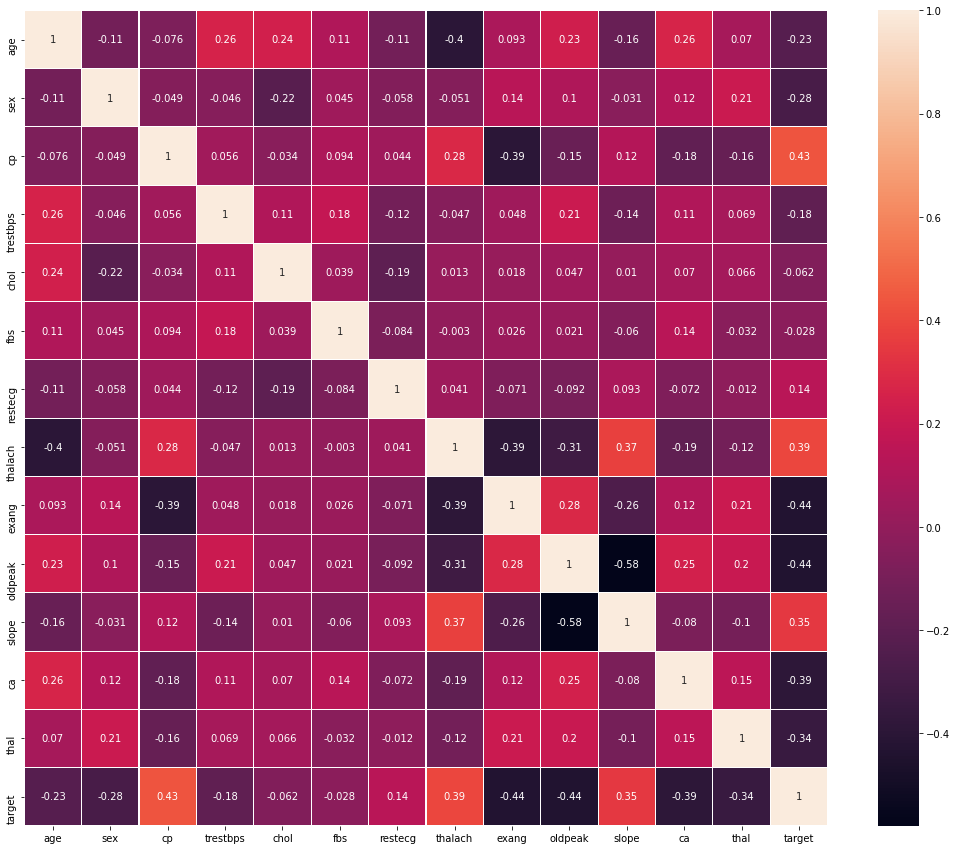

In [57]:
dataset_correlation = dataset.corr()
plt.figure(figsize=[18,15])
sns.heatmap(dataset_correlation,cmap="rocket", xticklabels = dataset_correlation.columns,
            yticklabels = dataset_correlation.columns,linewidths=0.1, annot = True)

## 1.14- Pairplot in respect to feature :'sex'

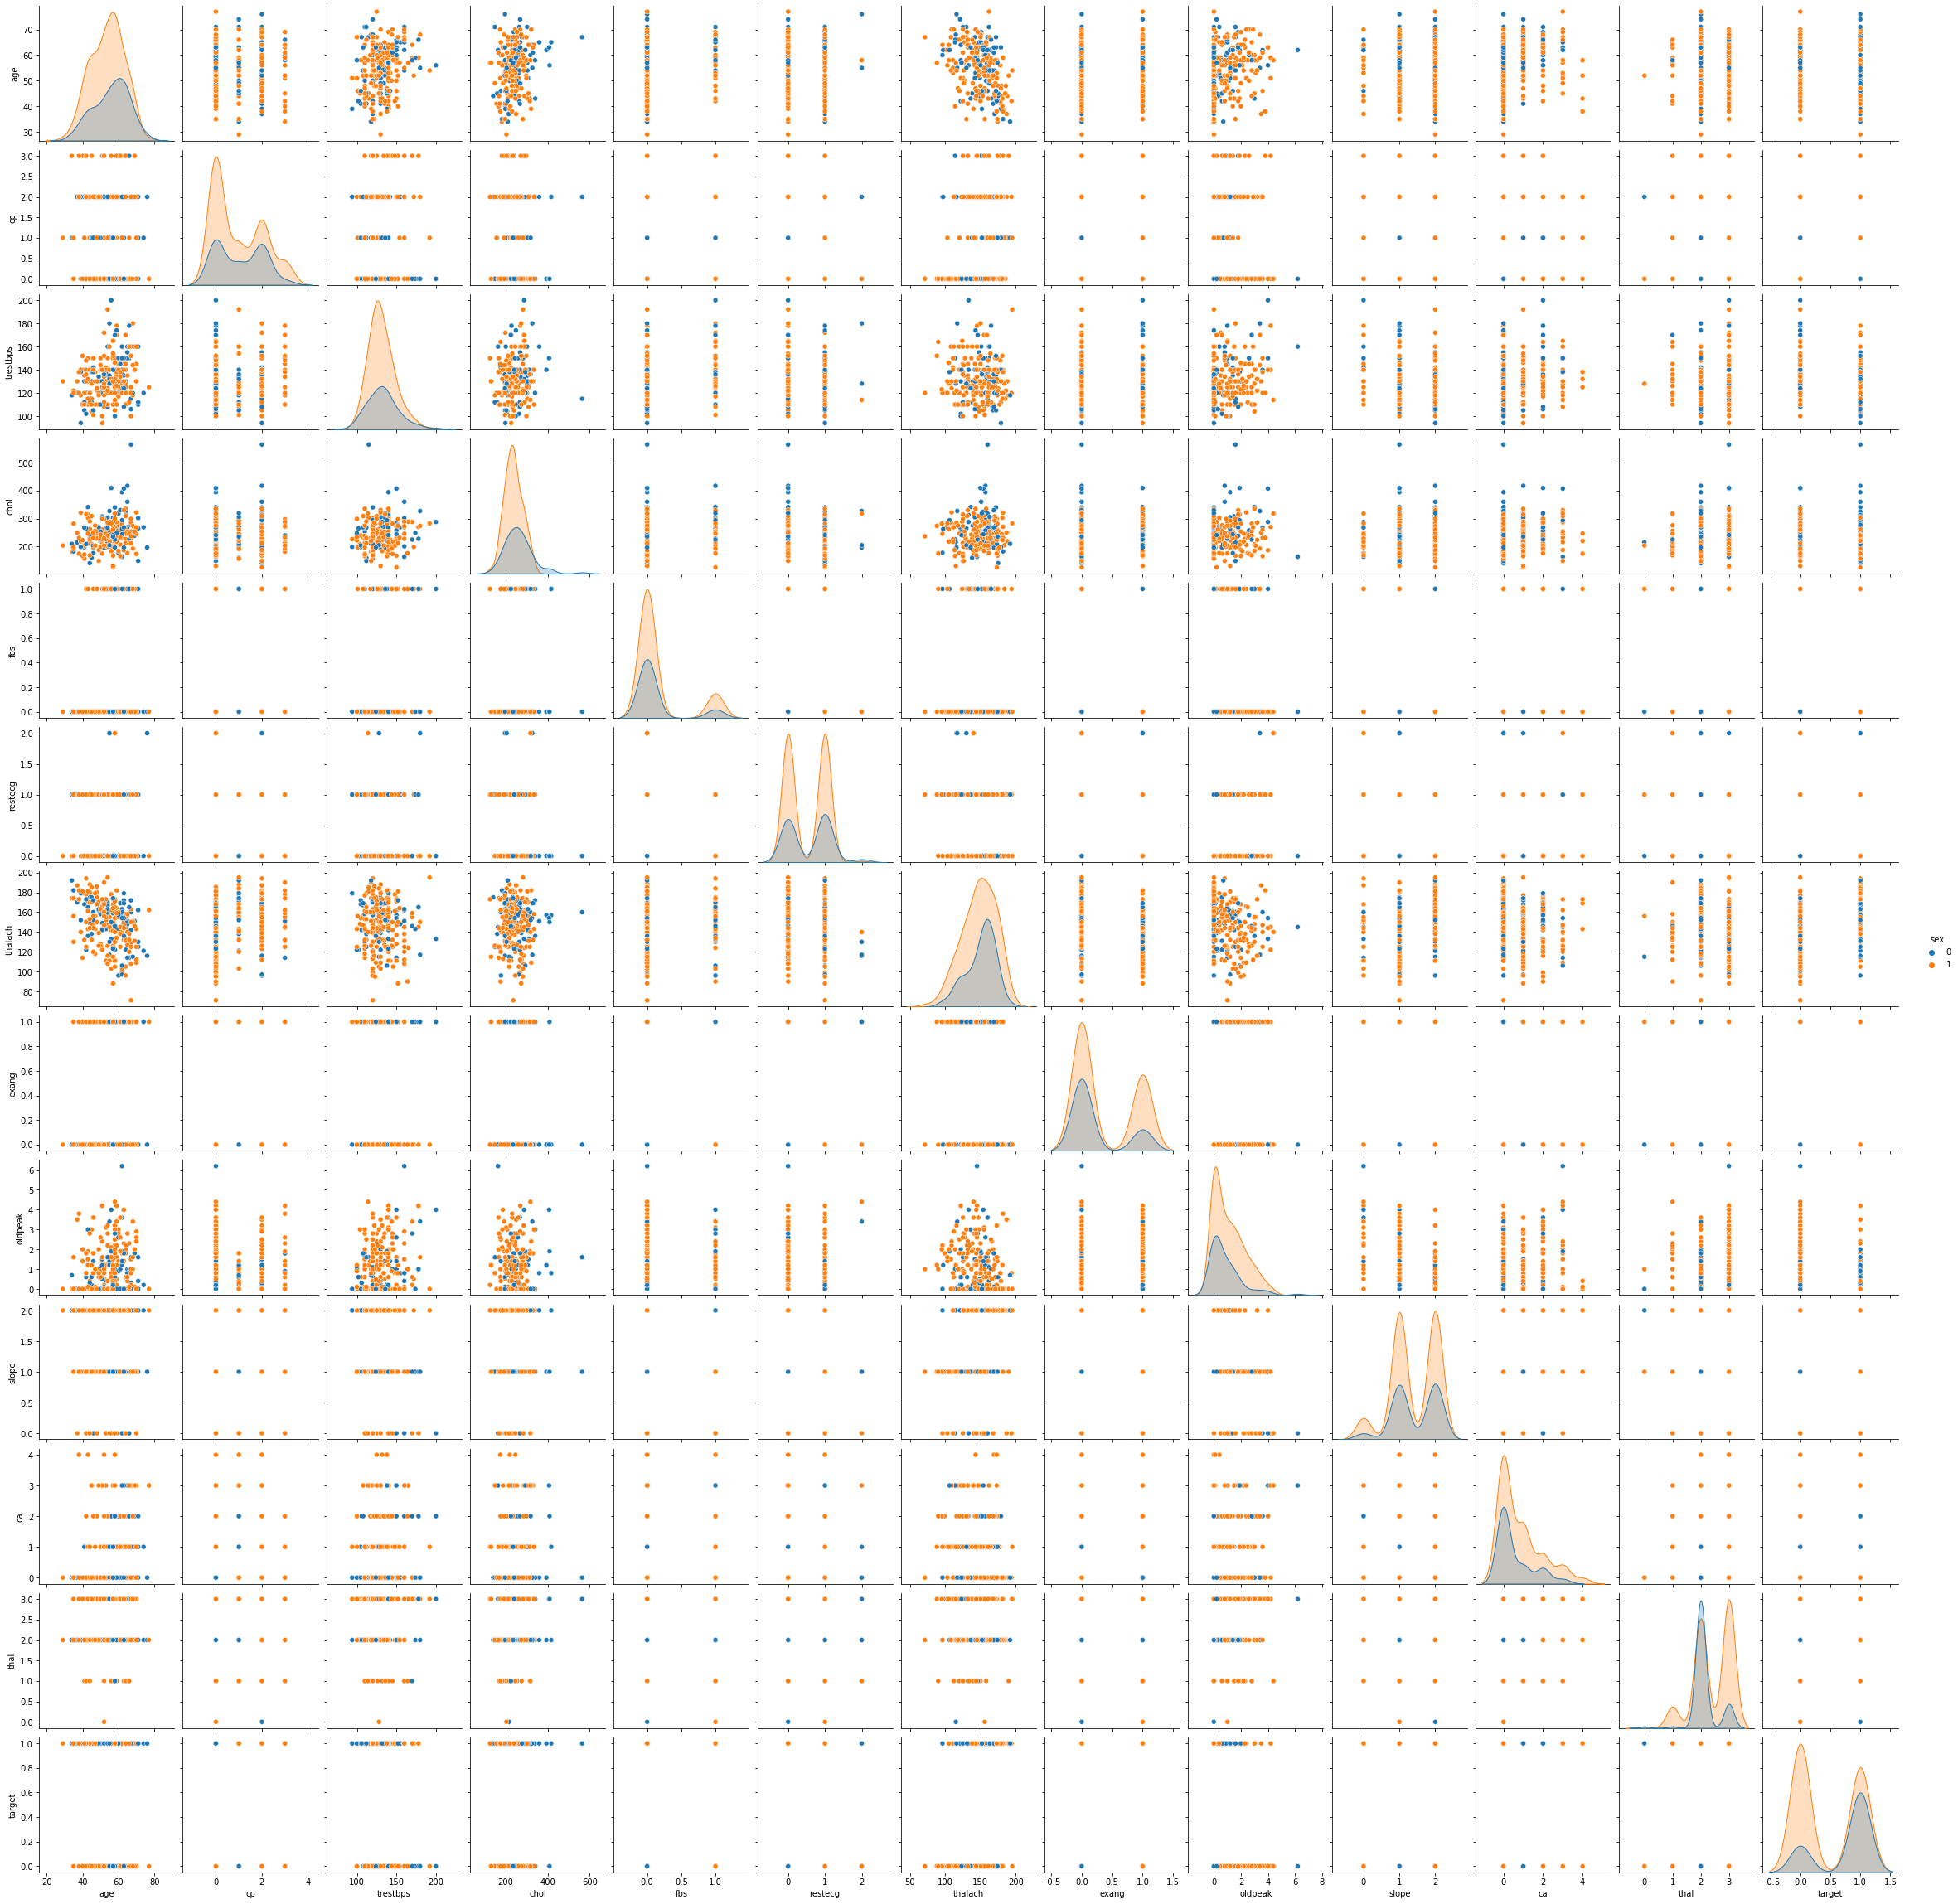

In [58]:
sns.pairplot(dataset,kind='scatter',hue='sex')

## 1.14- Pairplot in respect to feature :'target'

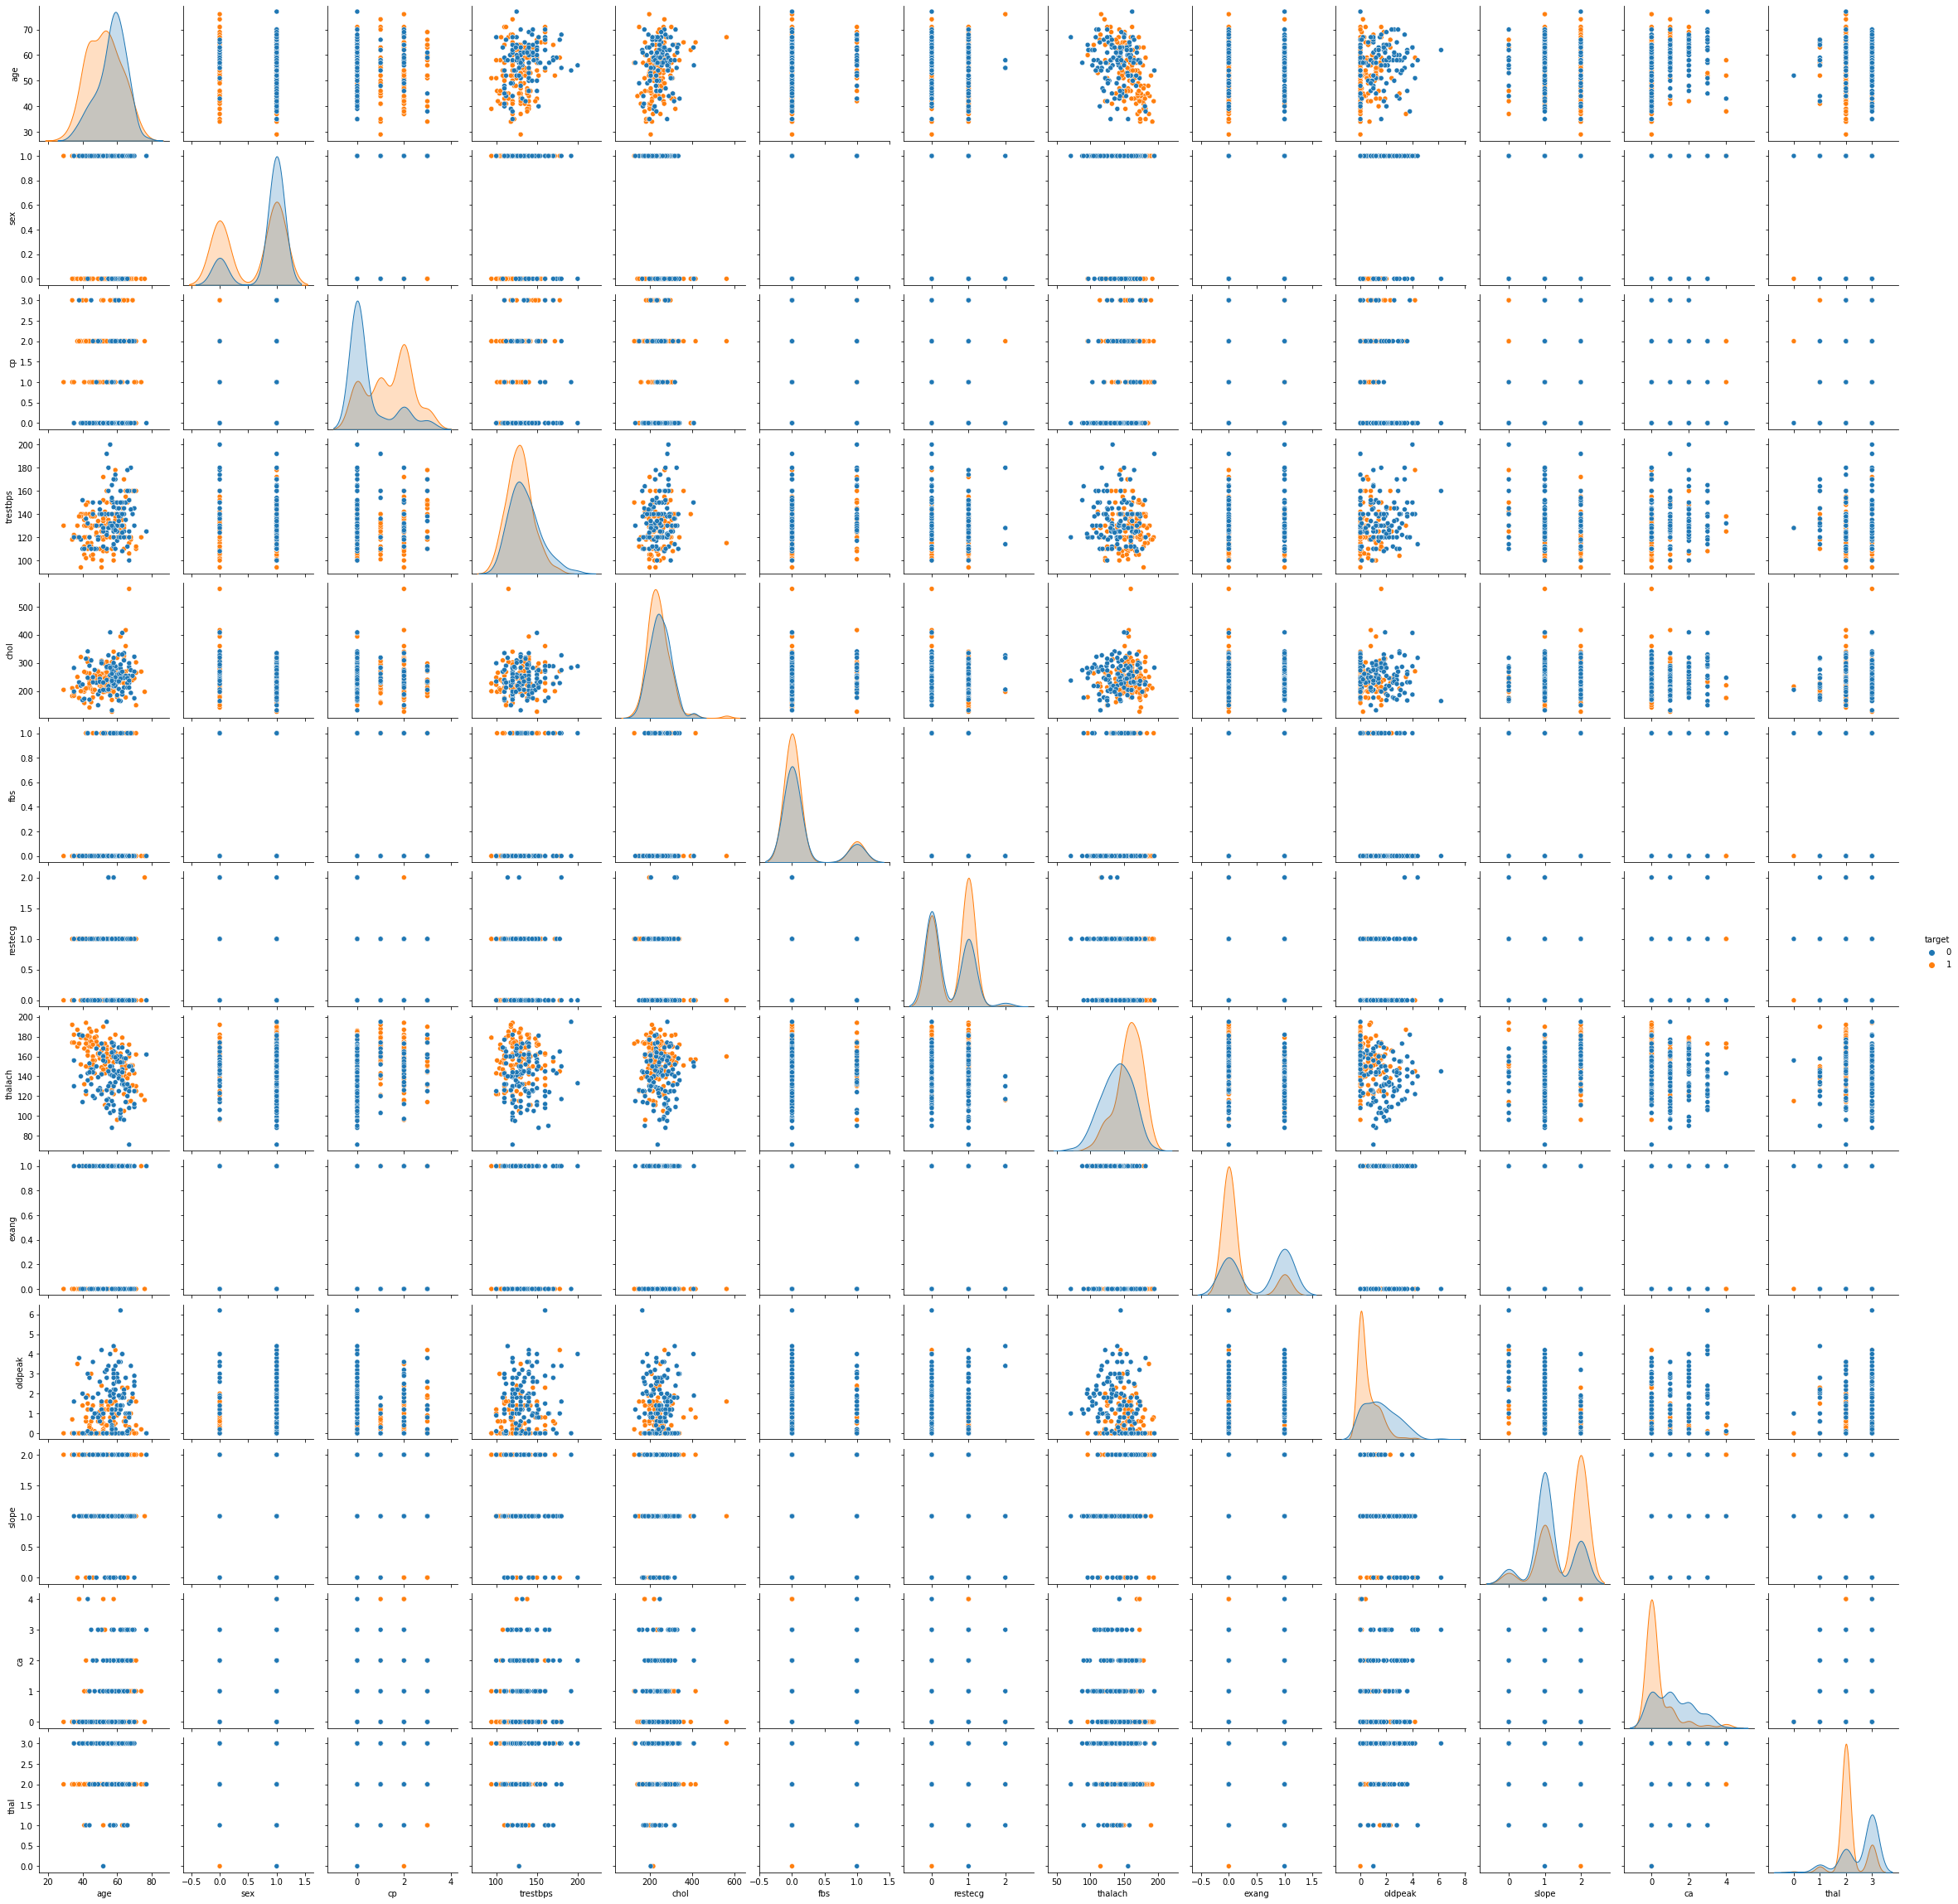

In [59]:
 sns.pairplot(dataset,hue='target')

## 1.15- A bit of contemplation on scatterplot

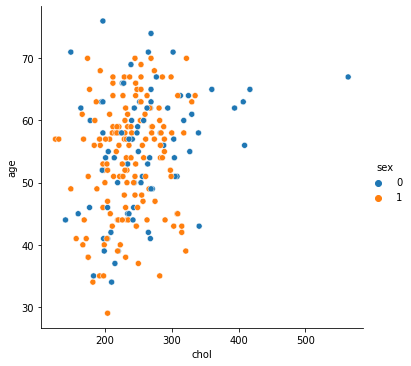

In [60]:
sns.relplot(x='chol',y='age', hue='sex', data = dataset)

In [61]:
len(dataset[dataset['chol']>=300])

35

In [62]:
len(dataset[dataset['chol']>=300][dataset['sex']==0])/35

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.5714285714285714

In [63]:
len(dataset[dataset['chol']>=300][dataset['sex']==1])/35

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.42857142857142855

## 1.16- Preventing occlusion of data on age-chol scatterplot

C:\Users\pc\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


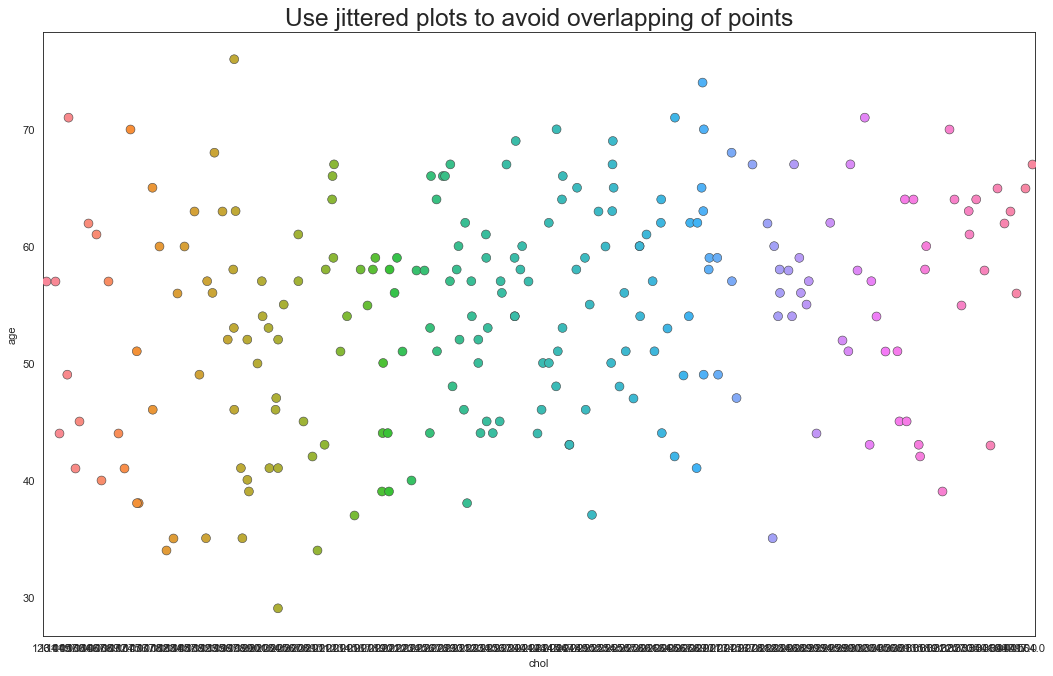

In [81]:

fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot( dataset['chol'],dataset['age'], jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.show()

# 2- Preporcessing

## 2.1- Outlier detection and removal via IQR

In [83]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age         15.00
sex          1.00
cp           2.00
trestbps    20.00
chol        65.75
fbs          0.00
restecg      1.00
thalach     33.00
exang        1.00
oldpeak      1.60
slope        1.00
ca           1.00
thal         1.00
target       1.00
dtype: float64


### Removal of outliers based on IQR

In [84]:
dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

Let's see if any data are removed

In [85]:
dataset.shape

(230, 14)

##### What is changed in terms of description

In [87]:
dataset.describe()

age         sex          cp    trestbps        chol    fbs  \
count  201.000000  230.000000  230.000000  206.000000  198.000000  230.0   
mean    53.427861    0.673913    0.934783  128.771845  240.126263    0.0   
std      9.467102    0.469802    1.019508   15.340092   43.340925    0.0   
min     29.000000    0.000000    0.000000   94.000000  131.000000    0.0   
25%     45.000000    0.000000    0.000000  120.000000  207.250000    0.0   
50%     54.000000    1.000000    1.000000  130.000000  236.000000    0.0   
75%     61.000000    1.000000    2.000000  140.000000  269.000000    0.0   
max     76.000000    1.000000    3.000000  170.000000  360.000000    0.0   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  230.000000  210.000000  230.000000  210.000000  230.000000  230.000000   
mean     0.552174  149.685714    0.321739    0.931905    1.447826    0.473913   
std      0.515582   22.473084    0.468162    1.054760    0.594274    0.697292   
min      0.000000   88.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  132.000000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.600000    1.500000    0.000000   
75%      1.000000  167.750000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  192.000000    1.000000    4.000000    2.000000    2.000000   

             thal      target  
count  230.000000  230.000000  
mean     2.317391    0.578261  
std      0.560063    0.494914  
min      1.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

So we lost 73 data during the process of removing outliers

* Let's see if anything wrong has happened to the dataset

In [88]:
dataset.head()

age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
1  37.0    1   2     130.0  250.0    0        1    187.0      0      3.5   
2  41.0    0   1     130.0  204.0    0        0      NaN      0      NaN   
3  56.0    1   1     120.0  236.0    0        1    178.0      0      0.8   
4  57.0    0   0     120.0    NaN    0        1    163.0      1      0.6   
5  57.0    1   0     140.0  192.0    0        1    148.0      0      NaN   

   slope  ca  thal  target  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
4      2   0     2       1  
5      1   0     1       1

In [89]:
dataset.tail()

age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
296  63.0    0   0     124.0  197.0    0        1    136.0      1      0.0   
298  57.0    0   0     140.0  241.0    0        1    123.0      1      0.2   
299  45.0    1   3     110.0    NaN    0        1    132.0      0      1.2   
301  57.0    1   0     130.0  131.0    0        1    115.0      1      1.2   
302  57.0    0   1       NaN  236.0    0        0    174.0      0      NaN   

     slope  ca  thal  target  
296      1   0     2       0  
298      1   0     3       0  
299      1   0     3       0  
301      1   1     3       0  
302      1   1     2       0

Oops!! we've got 298th  instance right after 296th ! 
Seems we have to reindex our instances

In [92]:
dataset.reset_index(drop=True)

age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    37.0    1   2     130.0  250.0    0        1    187.0      0      3.5   
1    41.0    0   1     130.0  204.0    0        0      NaN      0      NaN   
2    56.0    1   1     120.0  236.0    0        1    178.0      0      0.8   
3    57.0    0   0     120.0    NaN    0        1    163.0      1      0.6   
4    57.0    1   0     140.0  192.0    0        1    148.0      0      NaN   
..    ...  ...  ..       ...    ...  ...      ...      ...    ...      ...   
225  63.0    0   0     124.0  197.0    0        1    136.0      1      0.0   
226  57.0    0   0     140.0  241.0    0        1    123.0      1      0.2   
227  45.0    1   3     110.0    NaN    0        1    132.0      0      1.2   
228  57.0    1   0     130.0  131.0    0        1    115.0      1      1.2   
229  57.0    0   1       NaN  236.0    0        0    174.0      0      NaN   

     slope  ca  thal  target  
0        0   0     2       1  
1        2   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        1   0     1       1  
..     ...  ..   ...     ...  
225      1   0     2       0  
226      1   0     3       0  
227      1   0     3       0  
228      1   1     3       0  
229      1   1     2       0  

[230 rows x 14 columns]

Let's extract whatever is done 

In [95]:
dataset.to_csv(r'C:\Users\pc\dataset1.csv', index = False, header=True)

In [19]:
dataset1 = pd.read_csv('dataset1.csv')

## 2.2- Sampling via stratified shuffle split

In [255]:
X= dataset1.iloc[:,:13] # Outlier-free dataset without the target column
y = dataset1.iloc[:,13]

In [176]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.4,random_state=35)
for train_index, test_index in split.split(X,y):
    X_train =X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y.loc[train_index]
    y_test = y.loc[test_index]
    X_train.columns = columns
    X_test.columns = columns

In [121]:
X_train.shape

(172, 13)

In [122]:
X_test.shape

(58, 13)

## 2.3- Equalizing the percentage of missing data in each column

In [11]:
def miss_equalizer(perc,X):
    '''
    docstring
    
    perc = desired percentage of missing data for each column
    X = Dataset without the class column
    
    '''
    
    for column in X.columns :
            d = dataset1[column].isnull().sum()
            
            X.loc[X.sample(n = round(perc*dataset1.shape[0]-d)).index, column] = pd.np.nan

In [21]:
miss_equalizer(0.14,X)

In [22]:
missing(X,columns)

age   missing data percentage is   0.1391304347826087
Minmum_number_of_missings_needed  is  0
sex   missing data percentage is   0.1391304347826087
Minmum_number_of_missings_needed  is  0
cp   missing data percentage is   0.1391304347826087
Minmum_number_of_missings_needed  is  0
trestbps   missing data percentage is   0.1391304347826087
Minmum_number_of_missings_needed  is  0
chol   missing data percentage is   0.1391304347826087
Minmum_number_of_missings_needed  is  0
fbs   missing data percentage is   0.1391304347826087
Minmum_number_of_missings_needed  is  0
restecg   missing data percentage is   0.1391304347826087
Minmum_number_of_missings_needed  is  0
thalach   missing data percentage is   0.13043478260869565
Minmum_number_of_missings_needed  is  2
exang   missing data percentage is   0.1391304347826087
Minmum_number_of_missings_needed  is  0
oldpeak   missing data percentage is   0.1391304347826087
Minmum_number_of_missings_needed  is  0
slope   missing data percentage is   0.1

Now, we have to make sure that every change made is saved:

In [23]:
dataset1.iloc[:,:13] = X

In [24]:
missing(dataset1,columns)

age   missing data percentage is   0.1391304347826087
Minmum_number_of_missings_needed  is  0
sex   missing data percentage is   0.1391304347826087
Minmum_number_of_missings_needed  is  0
cp   missing data percentage is   0.1391304347826087
Minmum_number_of_missings_needed  is  0
trestbps   missing data percentage is   0.1391304347826087
Minmum_number_of_missings_needed  is  0
chol   missing data percentage is   0.1391304347826087
Minmum_number_of_missings_needed  is  0
fbs   missing data percentage is   0.1391304347826087
Minmum_number_of_missings_needed  is  0
restecg   missing data percentage is   0.1391304347826087
Minmum_number_of_missings_needed  is  0
thalach   missing data percentage is   0.13043478260869565
Minmum_number_of_missings_needed  is  2
exang   missing data percentage is   0.1391304347826087
Minmum_number_of_missings_needed  is  0
oldpeak   missing data percentage is   0.1391304347826087
Minmum_number_of_missings_needed  is  0
slope   missing data percentage is   0.1

So now we're sure that data deletion is saved

In [25]:
dataset1.to_csv(r'C:\Users\pc\dataset2.csv', index = False, header=True)

In [26]:
dataset2 = pd.read_csv('dataset2.csv')

In [27]:
dataset2.shape

(230, 14)

## 2.4- Missing data imputation via IterativeImputer

In [28]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [29]:
imp = IterativeImputer(max_iter=10, random_state=0,imputation_order='ascending')
dataset3 = imp.fit_transform(dataset2)

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_auc_score,roc_curve,f1_score

def dt(X_train,y_train):
    
    
    dt = imp.fit(X_train,y_train)
    y_predict_test = dt.predict(X_test)
    acc = accuracy_score(y_test, y_predict)
    return print(" Accuracy is :", acc)

print("when imputation of numerical features is mean and categoricals is mode (approach2)")
dt(X_train,y_train)

In [33]:
dataset3 = pd.DataFrame(dataset3)

In [34]:
dataset3.describe()

0           1           2           3           4      5   \
count  230.000000  230.000000  230.000000  230.000000  230.000000  230.0   
mean    53.593008    0.676776    0.934533  129.162185  240.088957    0.0   
std      8.877095    0.435260    0.957993   14.317149   40.228626    0.0   
min     29.000000    0.000000    0.000000   94.000000  131.000000    0.0   
25%     46.779378    0.000000    0.000000  120.000000  213.250000    0.0   
50%     54.000000    1.000000    1.000000  130.000000  239.441670    0.0   
75%     60.000000    1.000000    2.000000  138.000000  264.750000    0.0   
max     76.000000    1.000000    3.000000  170.000000  360.000000    0.0   

               6           7           8           9           10          11  \
count  230.000000  230.000000  230.000000  230.000000  230.000000  230.000000   
mean     0.555194  150.387006    0.335109    0.977878    1.478710    0.505266   
std      0.481562   21.440752    0.450737    1.027167    0.558613    0.677339   
min      0.000000   95.000000   -0.154737   -0.116730    0.000000   -0.221244   
25%      0.000000  133.750000    0.000000    0.000000    1.000000    0.000000   
50%      0.600205  154.000000    0.000000    0.763779    1.691025    0.000000   
75%      1.000000  165.482058    1.000000    1.600000    2.000000    1.000000   
max      2.000000  192.000000    1.000000    4.000000    2.065248    2.000000   

               12          13  
count  230.000000  230.000000  
mean     2.320284    0.578261  
std      0.522742    0.494914  
min      1.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [35]:
dataset3.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
           'exang', 'oldpeak', 'slope', 'ca', 'thal','target']

In [36]:
dataset3.describe()

age         sex          cp    trestbps        chol    fbs  \
count  230.000000  230.000000  230.000000  230.000000  230.000000  230.0   
mean    53.593008    0.676776    0.934533  129.162185  240.088957    0.0   
std      8.877095    0.435260    0.957993   14.317149   40.228626    0.0   
min     29.000000    0.000000    0.000000   94.000000  131.000000    0.0   
25%     46.779378    0.000000    0.000000  120.000000  213.250000    0.0   
50%     54.000000    1.000000    1.000000  130.000000  239.441670    0.0   
75%     60.000000    1.000000    2.000000  138.000000  264.750000    0.0   
max     76.000000    1.000000    3.000000  170.000000  360.000000    0.0   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  230.000000  230.000000  230.000000  230.000000  230.000000  230.000000   
mean     0.555194  150.387006    0.335109    0.977878    1.478710    0.505266   
std      0.481562   21.440752    0.450737    1.027167    0.558613    0.677339   
min      0.000000   95.000000   -0.154737   -0.116730    0.000000   -0.221244   
25%      0.000000  133.750000    0.000000    0.000000    1.000000    0.000000   
50%      0.600205  154.000000    0.000000    0.763779    1.691025    0.000000   
75%      1.000000  165.482058    1.000000    1.600000    2.000000    1.000000   
max      2.000000  192.000000    1.000000    4.000000    2.065248    2.000000   

             thal      target  
count  230.000000  230.000000  
mean     2.320284    0.578261  
std      0.522742    0.494914  
min      1.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [37]:
dataset3.to_csv(r'C:\Users\pc\dataset3.csv', index = False, header=True)

## 2.5- Feature scaling via StandardScaler

In [143]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
X_train = norm.fit_transform(X_train)
X_test = norm.fit_transform(X_train)

# 3- Developing the classifier

## 3.1- Boosting model : XGBOOST (along with hyperparameter optimization via Grid search  )

In [205]:
params={
    'max_depth': [2,3,4], #[3,4,5,6,7,8,9], # 5 is good but takes too long in kaggle env
    'subsample': [0.4,0.5,0.6], #[0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'colsample_bytree': [0.5,0.6,0.7], #[0.5,0.6,0.7,0.8],
    'n_estimators': [1000,2000], #[1000,2000,3000]
    'reg_alpha': [ 0.02, 0.03, 0.04] #[0.01, 0.02, 0.03, 0.04]
    
}

In [244]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
XGBClassifier = XGBClassifier(booster = 'gblinear')
GridSearchCV = GridSearchCV(XGBClassifier,params,cv=10,scoring="roc_auc",n_jobs=1,verbose=2)

In order to keep track of time we have to apply time calculation via a made up function defined
as bellow:

In [45]:
from datetime import datetime

In [46]:
def timer(start_time=None):
    if not start_time:
        start_time= datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec = divmod((datetime.now() - start_time).total_seconds(),3600)
        tmin, tsec = divmod(temp_sec,60)
        print("\n Time Taken : %i hours %i minutes and %s seconds. "%(thour,tmin,round(tsec,2)))

In [209]:
start_time = timer(None)
GridSearchCV.fit(X_test,y_test)
timer(start_time)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:18:27] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:18:27] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:18:27] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:18:27] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:18:28] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:18:28] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:18:28] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:18:28] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:18:29] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:18:29] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:18:29] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:18:29] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:18:30] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:18:30] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:18:30] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:18:30] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:18:31] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:18:31] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:18:31] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:18:31] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:18:32] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:18:32] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:18:32] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:18:32] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:18:32] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:18:33] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:18:33] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:18:33] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:18:33] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:18:34] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:18:34] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:18:34] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:18:35] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:18:35] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:18:35] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:18:35] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:18:36] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:18:36] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:18:36] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:18:36] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:18:37] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:18:37] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:18:37] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:18:37] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:18:37] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:18:38] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:18:38] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:18:38] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:18:38] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:18:39] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:18:39] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:18:39] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:18:39] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.3s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:18:40] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.3s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:18:40] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.3s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:18:40] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:18:40] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:18:41] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:18:41] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:18:41] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:18:41] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:18:41] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:18:42] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:18:42] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:18:42] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:18:42] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:18:42] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:18:43] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:18:43] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:18:43] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:18:43] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:18:43] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:18:44] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:18:44] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:18:44] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:18:44] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:18:44] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:18:45] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:18:45] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.3s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:18:45] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.3s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:18:45] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:18:46] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:18:46] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:18:46] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:18:46] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:18:46] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:18:47] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:18:47] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:18:47] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:18:47] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:18:47] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:18:48] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:18:48] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:18:48] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:18:48] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:18:49] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:18:49] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:18:49] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:18:49] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:18:49] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:18:50] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:18:50] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:18:50] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:18:50] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:18:50] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:18:51] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:18:51] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:18:51] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:18:51] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:18:52] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:18:52] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:18:52] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:18:52] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:18:52] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:18:53] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:18:53] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:18:53] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:18:53] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:18:53] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:18:53] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:18:54] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:18:54] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:18:54] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:18:54] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:18:54] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:18:55] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:18:55] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:18:55] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:18:55] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:18:55] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:18:56] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:18:56] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:18:56] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:18:56] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:18:57] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:18:57] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:18:57] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:18:57] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:18:57] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:18:57] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:18:58] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:18:58] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:18:58] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:18:58] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:18:58] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:18:58] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:18:58] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:18:58] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:18:58] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:18:59] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:18:59] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:18:59] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:18:59] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:18:59] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:18:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:19:00] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:19:00] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:19:00] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:19:00] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:19:00] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:19:00] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:19:01] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:19:01] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:19:01] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:19:01] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:19:02] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:19:02] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:19:02] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:19:03] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:19:03] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:19:03] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:19:03] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:19:04] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:19:04] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:19:04] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:19:04] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:19:05] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:19:05] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:19:05] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:19:05] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:19:05] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:19:06] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:19:06] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:19:06] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:19:06] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:19:07] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:19:07] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:19:07] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:19:07] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:19:08] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:19:08] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:19:08] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:19:08] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:19:08] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:19:09] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:19:09] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:19:09] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:19:09] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:19:09] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:19:10] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:19:10] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:19:10] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:19:10] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:19:10] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:19:11] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:19:11] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:19:11] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:19:11] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:19:12] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:19:12] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:19:12] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:19:12] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:19:12] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:19:13] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:19:13] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:19:13] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:19:13] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:19:14] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:19:14] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:19:14] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:19:14] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:19:14] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:19:15] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:19:15] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:19:15] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:19:15] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:19:15] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:19:16] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:19:16] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:19:16] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:19:16] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:19:16] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:19:17] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:19:17] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:19:17] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:19:17] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:19:17] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:19:18] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:19:18] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:19:18] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:19:18] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:19:19] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:19:19] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:19:19] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:19:19] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:19:19] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:19:20] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:19:20] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:19:20] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:19:20] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:19:20] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:19:21] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:19:21] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:19:21] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:19:21] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:19:21] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:19:22] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:19:22] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:19:22] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:19:22] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:19:22] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:19:23] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:19:23] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:19:23] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:19:24] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:19:24] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:19:24] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:19:24] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:19:25] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:19:25] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:19:25] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:19:25] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:19:25] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:19:26] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:19:26] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:19:26] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:19:26] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:19:27] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:19:27] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:19:27] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:19:27] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:19:28] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:19:28] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:19:28] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:19:28] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:19:28] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:19:29] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:19:29] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:19:29] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:19:30] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:19:30] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:19:30] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:19:30] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:19:31] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:19:31] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:19:31] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:19:31] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:19:32] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:19:32] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:19:32] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:19:32] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:19:33] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:19:33] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:19:33] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:19:33] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:19:33] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:19:34] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:19:34] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:19:34] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:19:35] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:19:35] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:19:35] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:19:35] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:19:36] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:19:36] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:19:36] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:19:36] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:19:37] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:19:37] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:19:37] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:19:37] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:19:38] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:19:38] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:19:38] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:19:38] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:19:39] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:19:39] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:19:39] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:19:39] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:19:39] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:19:40] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.3s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:19:40] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:19:40] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:19:40] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:19:41] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:19:41] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:19:41] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:19:41] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:19:41] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:19:42] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:19:42] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:19:42] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:19:42] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:19:42] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:19:43] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:19:43] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:19:43] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:19:43] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:19:43] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:19:44] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:19:44] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:19:44] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:19:44] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:19:44] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:19:45] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:19:45] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.3s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:19:45] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.3s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:19:45] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:19:46] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:19:46] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:19:46] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:19:46] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:19:47] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:19:47] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:19:47] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:19:47] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:19:47] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:19:48] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:19:48] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:19:48] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:19:48] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:19:48] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:19:49] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:19:49] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:19:49] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:19:49] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:19:49] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:19:50] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:19:50] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:19:50] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:19:50] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:19:50] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:19:51] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:19:51] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:19:51] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:19:51] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:19:52] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:19:52] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:19:52] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:19:52] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:19:52] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:19:53] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:19:53] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:19:53] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:19:53] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:19:54] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:19:54] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:19:54] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:19:54] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:19:54] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:19:55] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:19:55] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:19:55] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:19:55] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:19:55] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:19:56] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:19:56] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:19:56] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:19:56] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:19:56] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:19:57] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:19:57] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:19:57] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:19:57] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:19:58] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.5, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:19:58] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:19:58] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:19:58] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:19:58] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:19:58] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:19:59] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:19:59] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:19:59] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:19:59] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:19:59] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:19:59] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:19:59] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:19:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:20:00] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:20:00] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:20:00] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:20:00] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:20:01] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:20:01] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:20:01] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:20:01] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:20:02] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:20:02] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:20:02] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:20:03] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:20:03] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:20:03] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:20:03] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:20:04] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:20:04] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:20:04] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:20:04] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:20:05] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:20:05] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:20:05] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:20:05] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:20:06] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:20:06] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:20:06] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:20:06] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:20:06] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:20:07] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:20:07] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:20:07] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:20:07] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:20:08] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:20:08] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:20:08] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:20:08] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:20:09] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:20:09] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:20:09] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:20:09] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:20:09] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:20:10] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:20:10] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:20:10] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:20:10] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:20:10] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:20:11] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:20:11] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:20:11] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:20:11] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:20:11] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:20:12] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:20:12] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:20:12] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:20:12] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:20:13] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:20:13] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:20:13] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:20:13] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:20:14] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:20:14] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:20:14] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:20:14] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:20:14] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:20:15] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:20:15] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:20:15] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:20:15] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:20:15] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:20:16] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:20:16] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:20:16] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:20:16] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:20:17] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:20:17] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:20:17] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:20:17] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:20:18] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:20:18] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:20:18] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:20:18] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:20:19] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:20:19] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:20:19] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:20:19] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:20:19] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:20:20] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:20:20] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:20:20] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:20:20] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:20:20] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:20:21] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:20:21] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:20:21] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:20:21] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:20:22] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:20:22] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:20:22] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:20:22] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:20:22] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:20:23] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:20:23] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:20:23] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:20:23] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:20:23] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.3s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:20:24] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.3s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:20:24] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:20:24] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:20:25] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:20:25] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:20:25] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:20:25] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:20:25] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:20:26] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:20:26] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:20:26] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:20:26] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:20:26] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:20:27] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:20:27] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:20:27] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:20:27] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:20:28] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:20:28] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:20:28] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:20:28] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:20:29] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:20:29] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:20:29] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:20:29] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:20:30] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:20:30] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:20:30] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:20:30] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:20:30] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:20:31] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:20:31] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:20:31] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:20:31] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:20:32] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:20:32] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:20:32] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:20:32] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:20:32] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:20:33] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:20:33] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:20:33] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:20:33] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:20:34] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:20:34] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:20:34] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:20:34] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:20:34] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:20:35] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:20:35] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:20:35] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:20:35] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:20:36] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:20:36] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:20:36] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:20:36] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:20:37] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:20:37] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:20:37] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:20:37] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:20:37] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:20:37] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:20:37] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:20:37] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:20:38] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:20:38] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:20:38] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:20:38] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:20:38] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:20:38] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:20:38] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:20:39] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:20:39] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:20:39] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:20:39] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:20:39] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:20:39] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:20:40] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:20:40] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:20:40] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.3s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:20:40] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.3s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:20:41] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:20:41] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:20:41] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:20:41] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:20:41] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:20:42] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:20:42] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:20:42] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:20:42] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:20:42] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:20:43] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:20:43] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:20:43] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:20:43] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:20:43] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:20:44] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:20:44] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:20:44] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:20:44] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:20:44] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:20:45] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:20:45] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:20:45] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:20:45] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:20:45] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.3s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:20:46] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.3s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:20:46] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:20:46] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:20:47] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:20:47] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:20:47] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:20:47] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:20:47] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:20:48] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:20:48] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:20:48] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:20:48] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:20:49] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:20:49] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:20:49] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:20:49] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:20:49] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:20:50] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:20:50] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:20:50] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:20:50] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:20:51] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:20:51] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:20:51] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.4s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:20:51] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:20:52] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:20:52] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:20:52] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:20:52] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:20:52] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:20:53] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:20:53] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:20:53] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:20:53] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:20:54] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:20:54] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:20:54] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:20:54] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:20:55] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:20:55] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:20:55] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:20:55] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:20:55] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:20:56] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:20:56] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:20:56] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:20:56] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:20:57] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:20:57] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:20:57] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:20:57] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:20:58] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:20:58] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:20:58] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:20:58] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:20:58] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:20:59] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:20:59] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:20:59] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:20:59] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:20:59] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:20:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:21:00] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:21:00] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:21:00] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:21:00] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:21:01] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:21:01] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:21:01] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:21:01] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:21:02] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:21:02] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:21:02] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:21:02] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:21:02] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:21:03] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:21:03] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:21:03] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:21:04] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:21:04] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:21:04] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:21:04] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:21:05] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:21:05] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:21:05] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:21:05] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:21:06] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:21:06] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:21:06] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:21:06] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:21:07] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:21:07] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:21:07] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:21:07] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:21:08] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:21:08] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:21:08] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:21:08] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:21:08] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:21:09] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:21:09] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:21:09] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:21:09] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:21:10] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:21:10] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:21:10] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:21:10] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:21:11] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:21:11] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:21:11] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:21:11] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:21:12] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:21:12] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:21:12] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:21:12] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:21:12] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:21:13] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:21:13] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:21:13] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:21:14] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:21:14] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:21:14] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:21:14] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:21:14] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:21:15] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:21:15] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:21:15] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:21:15] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:21:16] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:21:16] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:21:16] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:21:16] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:21:16] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:21:17] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:21:17] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:21:17] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:21:17] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:21:18] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:21:18] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:21:18] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:21:18] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:21:18] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.3s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:21:19] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.3s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:21:19] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:21:19] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:21:19] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:21:20] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:21:20] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:21:20] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:21:20] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:21:21] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:21:21] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:21:21] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:21:21] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:21:21] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:21:22] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:21:22] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:21:22] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:21:22] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:21:22] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:21:23] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:21:23] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:21:23] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:21:23] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:21:23] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:21:24] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:21:24] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:21:24] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.3s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:21:24] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.3s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:21:24] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:21:25] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:21:25] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:21:25] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:21:25] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:21:26] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:21:26] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:21:26] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:21:26] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:21:26] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:21:27] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:21:27] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:21:27] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:21:27] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:21:27] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:21:28] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:21:28] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:21:28] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:21:28] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:21:28] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:21:29] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:21:29] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:21:29] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:21:29] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:21:30] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:21:30] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:21:30] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:21:30] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:21:31] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:21:31] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:21:31] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:21:31] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:21:31] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:21:32] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:21:32] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:21:32] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:21:32] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:21:32] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:21:33] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:21:33] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:21:33] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:21:33] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:21:33] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:21:34] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:21:34] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:21:34] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:21:34] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:21:35] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:21:35] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:21:35] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:21:35] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:21:36] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:21:36] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:21:36] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:21:36] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:21:37] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:21:37] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:21:37] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:21:37] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:21:38] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:21:38] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:21:38] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:21:38] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:21:39] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:21:39] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:21:39] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:21:39] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:21:40] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:21:40] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:21:40] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:21:40] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:21:41] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:21:41] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:21:41] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:21:41] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:21:41] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:21:42] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:21:42] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:21:42] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:21:42] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:21:42] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:21:43] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:21:43] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:21:43] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:21:43] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:21:43] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:21:44] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:21:44] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:21:44] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:21:44] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:21:44] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:21:45] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:21:45] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:21:45] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:21:45] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:21:46] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:21:46] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:21:46] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:21:46] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:21:47] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:21:47] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:21:47] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:21:47] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:21:47] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:21:48] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:21:48] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:21:48] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:21:48] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:21:48] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:21:49] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:21:49] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:21:49] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:21:49] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:21:49] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:21:50] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:21:50] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:21:50] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:21:50] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:21:50] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:21:51] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:21:51] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:21:51] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:21:51] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:21:52] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:21:52] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:21:52] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:21:52] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:21:52] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:21:53] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:21:53] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:21:53] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:21:53] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:21:54] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:21:54] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:21:54] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:21:54] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:21:54] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:21:55] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:21:55] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:21:55] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:21:55] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:21:55] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:21:56] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:21:56] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:21:56] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:21:56] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:21:57] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:21:57] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:21:57] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:21:58] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:21:58] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:21:58] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:21:58] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:21:58] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:21:59] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:21:59] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:21:59] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:21:59] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:21:59] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:21:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:22:00] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:22:00] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:22:00] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:22:00] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:22:01] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=2, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:22:01] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:22:01] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:22:01] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:22:02] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:22:02] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:22:02] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:22:02] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:22:03] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:22:03] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:22:03] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:22:04] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:22:04] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:22:04] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:22:04] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:22:05] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:22:05] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:22:05] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:22:05] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:22:06] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:22:06] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:22:06] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:22:06] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:22:07] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:22:07] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:22:07] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:22:07] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:22:08] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:22:08] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:22:08] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:22:08] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:22:09] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:22:09] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:22:09] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:22:09] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:22:10] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:22:10] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:22:10] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:22:10] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:22:11] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:22:11] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:22:11] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:22:11] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:22:12] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:22:12] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:22:12] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:22:12] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:22:12] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:22:13] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:22:13] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:22:13] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:22:13] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:22:14] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:22:14] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:22:14] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:22:14] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:22:15] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:22:15] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:22:15] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:22:15] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:22:15] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:22:16] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:22:16] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:22:16] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:22:16] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:22:17] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:22:17] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:22:17] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:22:17] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:22:17] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:22:18] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:22:18] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:22:18] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:22:18] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:22:19] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:22:19] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:22:19] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:22:19] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:22:20] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:22:20] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:22:20] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:22:20] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:22:20] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:22:21] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:22:21] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:22:21] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:22:21] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:22:22] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:22:22] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:22:22] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:22:22] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:22:23] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:22:23] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:22:23] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:22:23] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:22:23] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:22:24] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:22:24] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:22:24] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:22:24] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:22:24] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:22:25] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:22:25] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:22:25] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:22:26] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:22:26] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:22:26] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:22:26] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:22:26] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:22:27] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:22:27] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:22:27] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:22:27] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:22:28] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:22:28] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:22:28] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:22:28] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:22:28] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:22:29] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:22:29] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:22:29] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:22:29] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:22:30] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:22:30] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:22:30] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:22:30] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:22:31] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:22:31] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:22:31] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:22:31] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:22:32] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:22:32] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:22:32] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:22:32] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:22:32] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:22:33] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:22:33] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:22:33] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=3, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[03:22:33] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:22:33] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:22:33] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:22:34] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:22:34] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 
[03:22:34] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:22:34] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:22:35] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:22:35] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:22:35] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 
[03:22:35] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:22:35] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:22:36] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:22:36] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:22:36] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6 
[03:22:36] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.02, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:22:37] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:22:37] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:22:37] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:22:37] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:22:37] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 
[03:22:38] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:22:38] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:22:38] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:22:38] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:22:38] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:22:38] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:22:39] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might 

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 
[03:22:39] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:22:39] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:22:39] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:22:39] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:22:40] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 
[03:22:40] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.03, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:22:40] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:22:40] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:22:41] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:22:41] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:22:41] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 
[03:22:41] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.4, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:22:42] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:22:42] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:22:42] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:22:42] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5 
[03:22:43] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:22:43] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:22:43] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:22:43] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:22:44] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 
[03:22:44] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6 


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=1000, reg_alpha=0.04, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:22:44] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:22:44] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:22:45] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:22:45] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:22:45] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:22:45] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:22:45] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:22:46] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:22:46] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4 
[03:22:46] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:22:46] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:22:47] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:22:47] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:22:47] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:22:47] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:22:48] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:22:48] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:22:48] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:22:48] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5 
[03:22:48] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:22:49] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:22:49] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:22:49] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:22:49] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:22:50] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:22:50] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:22:50] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:22:50] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:22:51] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6 
[03:22:51] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.02, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:22:51] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:22:51] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:22:51] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:22:52] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:22:52] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:22:52] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.4s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:22:53] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:22:53] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:22:53] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4 
[03:22:53] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.4, total=   0.2s

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:22:53] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:22:54] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:22:54] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:22:54] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:22:54] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:22:55] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:22:55] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:22:55] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:22:55] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5 
[03:22:55] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:22:56] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:22:56] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:22:56] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:22:56] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:22:57] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:22:57] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:22:57] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:22:57] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:22:57] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6 
[03:22:58] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.03, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:22:58] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:22:58] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:22:59] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:22:59] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:22:59] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:22:59] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:22:59] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:22:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:23:00] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:23:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:23:00] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:23:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4 
[03:23:00] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:23:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.4, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:23:00] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:23:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:23:01] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:23:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:23:01] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:23:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:23:01] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:23:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:23:01] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:23:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:23:02] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:23:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:23:02] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:23:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:23:02] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:23:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:23:02] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:23:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5 
[03:23:03] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:23:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:23:03] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:23:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:23:03] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:23:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.4s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:23:04] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:23:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:23:04] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:23:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:23:04] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:23:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:23:04] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:23:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:23:05] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:23:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:23:05] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:23:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:23:05] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:23:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6 
[03:23:05] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:23:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.7, max_depth=4, n_estimators=2000, reg_alpha=0.04, subsample=0.6, total=   0.2s
[03:23:06] WARNING: ..\src\learner.cc:541: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:23:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time Taken : 0 hours 4 minutes and 38.58 seconds. 


[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:  4.6min finished
C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [210]:
GridSearchCV.best_params_

{'colsample_bytree': 0.5,
 'max_depth': 2,
 'n_estimators': 1000,
 'reg_alpha': 0.02,
 'subsample': 0.4}

In [211]:
GridSearchCV.best_estimator_

XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.5, gamma=None,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.5, max_delta_step=None, max_depth=2,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=8, num_parallel_tree=None,
              random_state=0, reg_alpha=0.02, reg_lambda=0, scale_pos_weight=1,
              subsample=0.4, tree_method=None, validate_parameters=1,
              verbosity=None)

In [245]:
XGBClassifier= XGBClassifier.fit(X_train,y_train,eval_metric='auc')

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


## 3.2- model evaluation

In [213]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [214]:
y_pred = XGBClassifier.predict(X_test)
y_pred_train = XGBClassifier.predict(X_train)
train_acc = accuracy_score(y_train, y_pred_train)
print("Confusion Matrix : \n")
print(confusion_matrix(y_test,y_pred))
print("===============")
print("Classification Report : \n")
print(classification_report(y_test,y_pred))

print("Classification Report train : \n")
print(classification_report(y_train,y_pred_train))

Confusion Matrix : 

[[31  8]
 [ 9 44]]
Classification Report : 

              precision    recall  f1-score   support

           0       0.78      0.79      0.78        39
           1       0.85      0.83      0.84        53

    accuracy                           0.82        92
   macro avg       0.81      0.81      0.81        92
weighted avg       0.82      0.82      0.82        92

Classification Report train : 

              precision    recall  f1-score   support

           0       0.81      0.72      0.76        58
           1       0.81      0.88      0.84        80

    accuracy                           0.81       138
   macro avg       0.81      0.80      0.80       138
weighted avg       0.81      0.81      0.81       138



In [215]:
XGBoost_Model_With_GridSearchCV_Optimization =round(accuracy_score(y_test,y_pred)*100,2)
XGBoost_Model_With_GridSearchCV_Optimization

81.52

In [216]:
XGBoost_Model_With_GridSearchCV_Optimization =round(accuracy_score(y_train,y_pred_train)*100,2)
XGBoost_Model_With_GridSearchCV_Optimization

81.16

###### It's obvious that my model is not overfitted, basically the reason for testing my classifier method
###### on my train data is to check if my classifier is overfitted.
###### and overfitting is deduced whenever our prediction accuracy on train dataset is higher than our prediction accuracy
###### by a 10% margin.

###### I solved the overfitting problem by changing 'booster' to 'gblinear',
###### But before this, i had accuracies ranging from 79 to 94 percent and all of them had 100percent accuracy on train data.

## 3.3- Cross validation

Since the prediction fluctuates with random_size variable due to different test data set,
we are using Cross Validation to mitigate this problem.

##### stratfied K fold cross validation

In [217]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
XGBClassifier = XGBClassifier()
X.shape,y.shape

((230, 13), (230,))

Let's slice an instance to see if it's organized properly

In [129]:
X.iloc[169]

age          61.0
sex           1.0
cp            0.0
trestbps    120.0
chol        260.0
fbs           0.0
restecg       NaN
thalach     140.0
exang         1.0
oldpeak       3.6
slope         1.0
ca            1.0
thal          NaN
Name: 169, dtype: float64

**Let's observe how stratified k fold works**

In [218]:
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.metrics import accuracy_score
accuracy =[]

skf = skf(n_splits=10,shuffle = True , random_state = 26)
skf.get_n_splits(X,y)

for train_index,test_index in skf.split(X,y):
    print("Train : ",train_index," Validation : ",test_index)
    X1_train,X1_test = X.iloc[train_index], X.iloc[test_index]
    y1_train,y1_test = y.iloc[train_index], y.iloc[test_index]
    
    XGBClassifier.fit(X1_train,y1_train)
    prediction = XGBClassifier.predict(X1_test)
    score = accuracy_score(prediction,y1_test)
    accuracy.append(score)

print(accuracy)  
    

Train :  [  0   3   4   5   6   7   8   9  11  12  14  15  16  17  18  19  21  22
  23  24  25  26  27  28  30  32  33  34  35  36  37  39  41  42  43  44
  45  46  47  48  49  50  51  53  54  55  56  57  58  59  60  61  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 131 132 133 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 154 155 156 157 158 159
 160 161 162 163 164 166 167 168 169 170 171 172 173 174 175 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 195 196 197 198
 199 201 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 225 226 228 229]  Validation :  [  1   2  10  13  20  29  31  38  40  52  62  84 102 130 134 153 165 176
 194 200 202 224 227]
[03:29:30] WARNING: ..\src\learner.cc:10

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Train :  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  25  26  27  28  29  30  31  32  33  34  35  36  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  60  61  62  63  64  65  66  67  68  70  71  72  73  74  75  77
  78  79  80  81  82  83  84  85  86  87  88  89  91  92  94  95  96  97
  98  99 100 101 102 103 104 105 106 108 109 110 112 113 114 115 116 118
 119 120 121 122 124 125 126 127 128 129 130 131 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 148 149 150 151 152 153 154 155 156 157
 159 160 161 162 163 165 166 167 168 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 186 187 188 189 190 191 192 193 194 195 196 198
 199 200 201 202 204 205 206 208 209 210 211 212 213 214 215 216 218 219
 220 221 222 223 224 225 226 227 228]  Validation :  [  0  24  37  59  69  76  90  93 107 111 117 123 132 147 158 164 169 185
 197 203 207 217 229]
[03:29:30] WARNING: ..\src\learner.cc:10

In [219]:
Stratified_K_Fold_Score = round(np.array(accuracy).mean()*100,2)
Stratified_K_Fold_Score

83.48

###### Let's observe how k fold works

In [256]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
XGBClassifier = XGBClassifier()
score = cross_val_score(XGBClassifier,X,y,cv=10)

C:\Users\pc\Anaconda3\envs\cv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:23:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:23:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:23:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:23:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [257]:
score

array([0.82608696, 0.82608696, 0.82608696, 0.95652174, 0.91304348,
       0.91304348, 0.7826087 , 0.91304348, 0.73913043, 0.60869565])

In [258]:
K_fold_CV_Score = round(score.mean()*100)
K_fold_CV_Score

83

### Evaluations via plots

In [267]:
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve


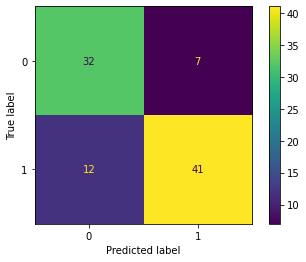

In [268]:
XGBClassifier = XGBClassifier()
XGBClassifier= XGBClassifier.fit(X_train,y_train,eval_metric='auc')
plot_confusion_matrix(XGBClassifier,X_test,y_test)


This is the confusion matrix of our classifier

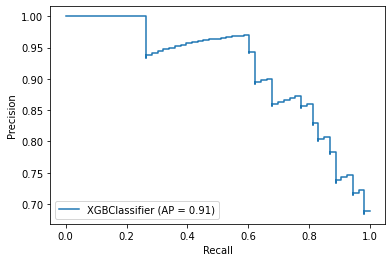

In [269]:
plot_precision_recall_curve(XGBClassifier,X_test,y_test)

precision_recall plot

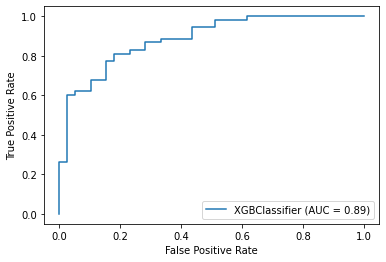

In [271]:
plot_roc_curve(XGBClassifier,X_test,y_test)

ROC curve for test data

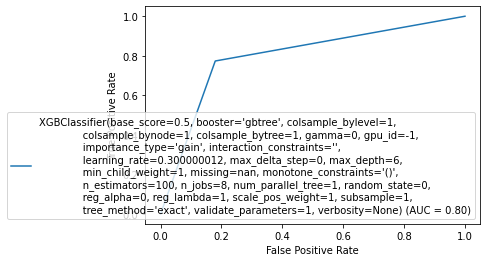

In [281]:
from sklearn.metrics import RocCurveDisplay
y_proba = XGBClassifier.predict(X_test)
fpr,tpr,threshold = roc_curve(y_test,y_proba)
roc_auc = auc(fpr, tpr) #------ auc of XGBOOST 
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=XGBClassifier)
display.plot()

ROC for our train data